<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project2</h3>
</div>

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## Importing the libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from keras.layers import Input


## Load and Prepare Data

In [2]:
df = pd.read_csv("Churn.csv")

## EDA

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df["Geography"].nunique()

3

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data Preprocessing

In [7]:
df = df.drop(["RowNumber", "Surname" ,"CustomerId"], axis=1)

In [8]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df["Gender"] = df["Gender"].str.strip().str.lower()
df["Gender"] = df["Gender"].map({'male': 0, 'female': 1})

In [10]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df = pd.get_dummies(df, columns=["Geography"], drop_first=False)

In [12]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,1,36,7,0.00,1,0,1,42085.58,1,True,False,False
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,False,True,False


In [13]:
df = df.astype(int) 


In [14]:
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.454300,38.921800,5.012800,76485.571500,1.530200,0.70550,0.515100,100089.748400,0.203700,0.501400,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.185107,0.581654,0.45584,0.499797,57510.491042,0.402769,0.500023,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51001.750000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,0.000000,37.000000,5.000000,97198.000000,1.000000,1.00000,1.000000,100193.500000,0.000000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127643.750000,2.000000,1.00000,1.000000,149387.750000,0.000000,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.000000,4.000000,1.00000,1.000000,199992.000000,1.000000,1.000000,1.000000,1.000000


## Strorytelling - Visualization

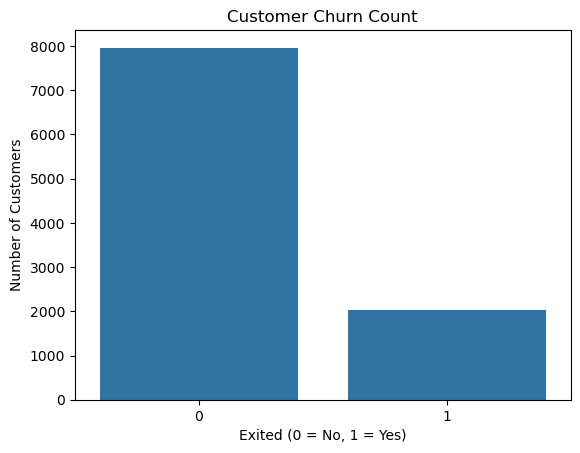

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Exited')
plt.title('Customer Churn Count')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()


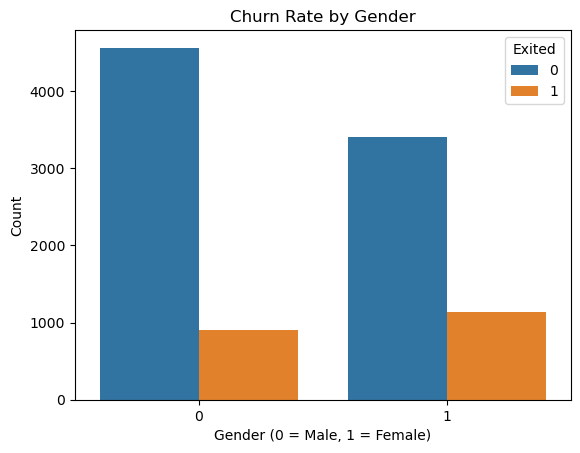

In [16]:
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.legend(title='Exited')
plt.show()


C:\Users\SasanMaleknia\AppData\Local\Temp\ipykernel_10452\3608228732.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_data['Geography'] = geo_data[geo_cols].idxmax(axis=1).str.replace('Geography_', '')


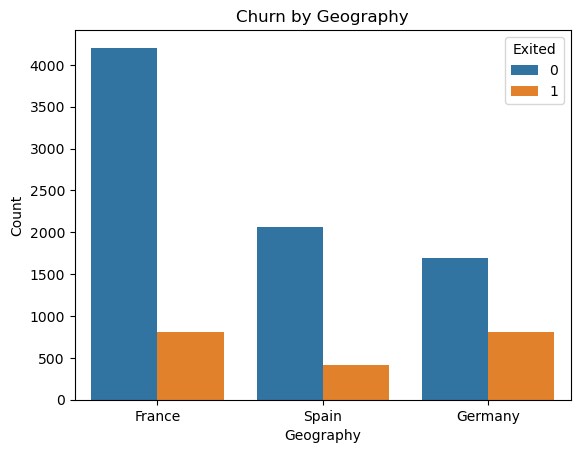

In [17]:
geo_cols = [col for col in df.columns if col.startswith('Geography_')]
geo_data = df[geo_cols + ['Exited']]

# Convert one-hot back to label
geo_data['Geography'] = geo_data[geo_cols].idxmax(axis=1).str.replace('Geography_', '')
sns.countplot(data=geo_data, x='Geography', hue='Exited')
plt.title('Churn by Geography')
plt.ylabel('Count')
plt.show()


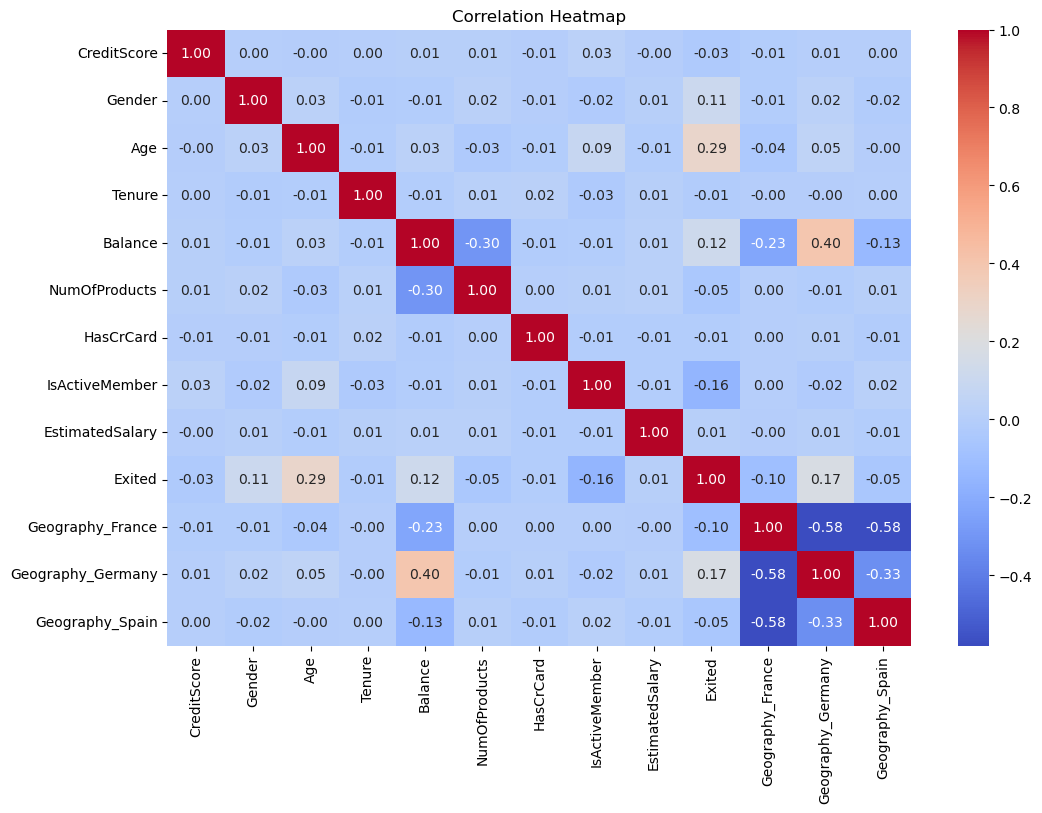

In [18]:
import numpy as np

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [19]:
order = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Geography_France', 'Geography_Germany', 'Geography_Spain', "Exited"]
df = df[order]
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,1,42,2,0,1,1,1,101348,1,0,0,1
1,608,1,41,1,83807,1,0,1,112542,0,0,1,0
2,502,1,42,8,159660,3,1,0,113931,1,0,0,1
3,699,1,39,1,0,2,0,0,93826,1,0,0,0
4,850,1,43,2,125510,1,1,1,79084,0,0,1,0


## Prepare Data for Machine learning

In [20]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(X[5])
print(y[5])

[   645      0     44      8 113755      2      1      0 149756      0
      0      1]
1


In [21]:
X_train, X_0, y_train, y_0 = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y 
)

X_test, X_val, y_test, y_val = train_test_split(
    X_0, y_0, test_size=0.1, random_state=42, stratify=y_0
)

In [22]:
print(f"training set shape :\n{X_train.shape, y_train.shape}")
print(f"testing set shape :\n{X_test.shape, y_test.shape}")
print(f"validation set shape :\n{X_val.shape, y_val.shape}")


training set shape :
((7000, 12), (7000,))
testing set shape :
((2700, 12), (2700,))
validation set shape :
((300, 12), (300,))


In [23]:
st_scaler = StandardScaler()
X_train = st_scaler.fit_transform(X_train)
X_test = st_scaler.transform(X_test)
X_val = st_scaler.transform(X_val)

## Train your model

In [55]:
model = Sequential(
    [
        Input(shape=(12,)),
        Dense(units=36, activation="relu"),
        Dense(units=36, activation="relu"),
        Dense(units=1, activation="sigmoid")
    ]
)

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 36)                468       
                                                                 
 dense_6 (Dense)             (None, 36)                1332      
                                                                 
 dense_7 (Dense)             (None, 1)                 37        
                                                                 
Total params: 1,837
Trainable params: 1,837
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(
    loss = "binary_crossentropy",
    optimizer="sgd",
    metrics= ["accuracy", "Precision"]
)

In [58]:
history = model.fit(
    X_train, y_train, epochs=30, validation_data=(X_val,y_val)
)

Epoch 1/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5233 - accuracy: 0.7841 - precision: 0.3251 - val_loss: 0.4812 - val_accuracy: 0.7967 - val_precision: 0.0000e+00
Epoch 2/30
219/219 [==============================] - 0s 1ms/step - loss: 0.4687 - accuracy: 0.7966 - precision: 0.6250 - val_loss: 0.4617 - val_accuracy: 0.8033 - val_precision: 1.0000
Epoch 3/30
219/219 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.8007 - precision: 0.6449 - val_loss: 0.4495 - val_accuracy: 0.8067 - val_precision: 0.8000
Epoch 4/30
219/219 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.8060 - precision: 0.6382 - val_loss: 0.4409 - val_accuracy: 0.8133 - val_precision: 0.8571
Epoch 5/30
219/219 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.8089 - precision: 0.6341 - val_loss: 0.4347 - val_accuracy: 0.8200 - val_precision: 0.8182
Epoch 6/30
219/219 [==============================] - 0s 1ms/step 

In [59]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 219}

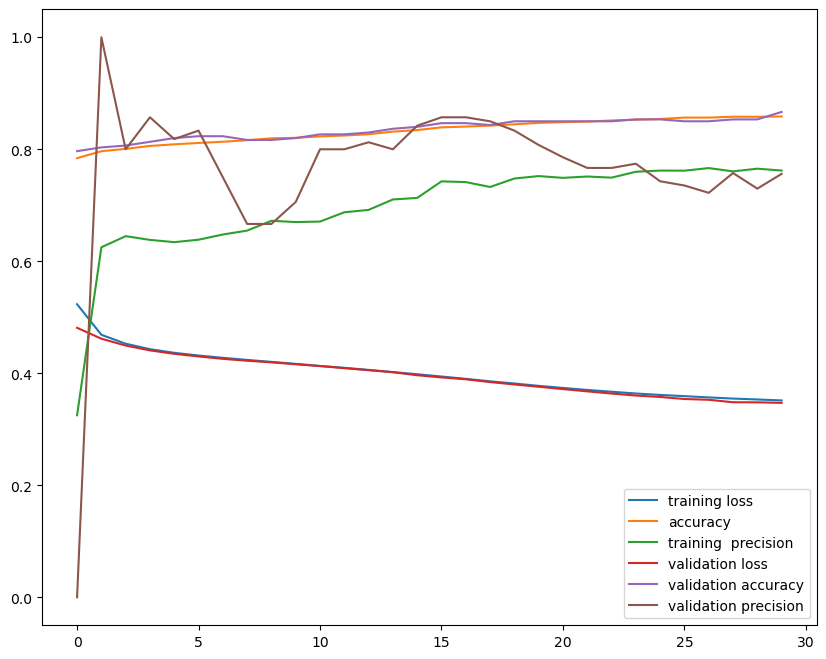

In [60]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(history.history["loss"], label="training loss");
ax.plot(history.history["accuracy"], label="accuracy")
ax.plot(history.history["precision"], label="training  precision")

ax.plot(history.history["val_loss"], label="validation loss");
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.plot(history.history["val_precision"], label="validation precision")

plt.legend()
plt.show()

## Test the model and show the metrics

In [61]:
eval = model.evaluate(X_test, y_test, verbose=1)

85/85 [==============================] - 0s 941us/step - loss: 0.3461 - accuracy: 0.8615 - precision: 0.7431


In [62]:
print(f"loss: {eval[0]}")
print(f"accuracy: {eval[1]}")

loss: 0.34613579511642456
accuracy: 0.8614814877510071


## Save your final model

## Send us the Result (Maktabkhoone)